Connect your drive with your mail

In [71]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


Set source folder which contains x_data and y_data

In [72]:
FOLDER = "/content/drive/MyDrive/Colab Notebooks/AI/acupunture/"
X_DATA_PATH = FOLDER + 'x_data.pickle'
Y_DATA_PATH = FOLDER + 'y_data.csv'
CLASSES_PATH = FOLDER + 'classes.txt'

# Load data

Load name of classes

In [73]:
with open(CLASSES_PATH, 'r') as file:
    classes = file.read().splitlines()
print('Number of classes: ', len(classes))
print(classes)

Number of classes:  17
['huyet Dai chuy', 'huyet Dai tru L', 'huyet Dai tru R', 'huyet Phe du L', 'huyet Phe du R', 'huyet Tam du L', 'huyet Tam du R', 'huyet Cach du L', 'huyet Cach du R', 'huyet Can du L', 'huyet Can du R', 'huyet Ty du L', 'huyet Ty du R', 'huyet Than du L', 'huyet Than du R', 'huyet Dai truong du L', 'huyet Dai truong du R']


Load x_data from drive

In [74]:
import glob
import pickle
import numpy as np
x_data = pickle.load(open(X_DATA_PATH, 'rb'))
x_data = np.array(x_data, dtype = 'float32')
IMAGE_SIZE = x_data.shape[1]
x_data = x_data.reshape(-1, IMAGE_SIZE, IMAGE_SIZE, 1)
print('Shape of x data: ', x_data.shape)

Shape of x data:  (153, 96, 96, 1)


Load y_data from drive

In [75]:
import pandas as pd
y_data = pd.read_csv(Y_DATA_PATH)
y_data.head(None)

,huyet Dai chuy x,huyet Dai chuy y,huyet Dai tru L x,huyet Dai tru L y,huyet Dai tru R x,huyet Dai tru R y,huyet Phe du L x,huyet Phe du L y,huyet Phe du R x,huyet Phe du R y,...,huyet Ty du R x,huyet Ty du R y,huyet Than du L x,huyet Than du L y,huyet Than du R x,huyet Than du R y,huyet Dai truong du L x,huyet Dai truong du L y,huyet Dai truong du R x,huyet Dai truong du R y
0,0.490,0.066,0.424,0.120,0.544,0.116,0.424,0.208,0.550,0.206,...,0.554,0.542,0.426,0.674,0.556,0.670,0.430,0.798,0.552,0.796
1,0.484,0.054,0.428,0.120,0.540,0.124,0.428,0.184,0.540,0.184,...,0.556,0.538,0.426,0.684,0.564,0.680,0.434,0.806,0.566,0.804
2,0.510,0.036,0.460,0.090,0.568,0.090,0.462,0.156,0.572,0.158,...,0.566,0.502,0.430,0.628,0.554,0.636,0.422,0.784,0.552,0.780
3,0.490,0.074,0.426,0.146,0.546,0.152,0.428,0.210,0.546,0.210,...,0.554,0.522,0.440,0.690,0.560,0.692,0.446,0.798,0.564,0.800
4,0.496,0.068,0.434,0.130,0.548,0.128,0.434,0.194,0.550,0.194,...,0.520,0.590,0.394,0.714,0.518,0.728,0.384,0.844,0.520,0.854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,0.496,0.080,0.428,0.142,0.546,0.148,0.422,0.236,0.548,0.240,...,0.528,0.642,0.400,0.772,0.526,0.778,0.402,0.890,0.518,0.896
149,0.500,0.034,0.430,0.084,0.560,0.080,0.428,0.168,0.554,0.166,...,0.554,0.590,0.432,0.700,0.562,0.702,0.434,0.844,0.556,0.844
150,0.492,0.026,0.428,0.090,0.556,0.096,0.430,0.212,0.556,0.206,...,0.568,0.680,0.436,0.834,0.574,0.832,0.432,0.952,0.576,0.942
151,0.498,0.052,0.450,0.114,0.526,0.116,0.454,0.192,0.524,0.198,...,0.536,0.574,0.448,0.700,0.544,0.706,0.454,0.850,0.552,0.844


Show some images to check

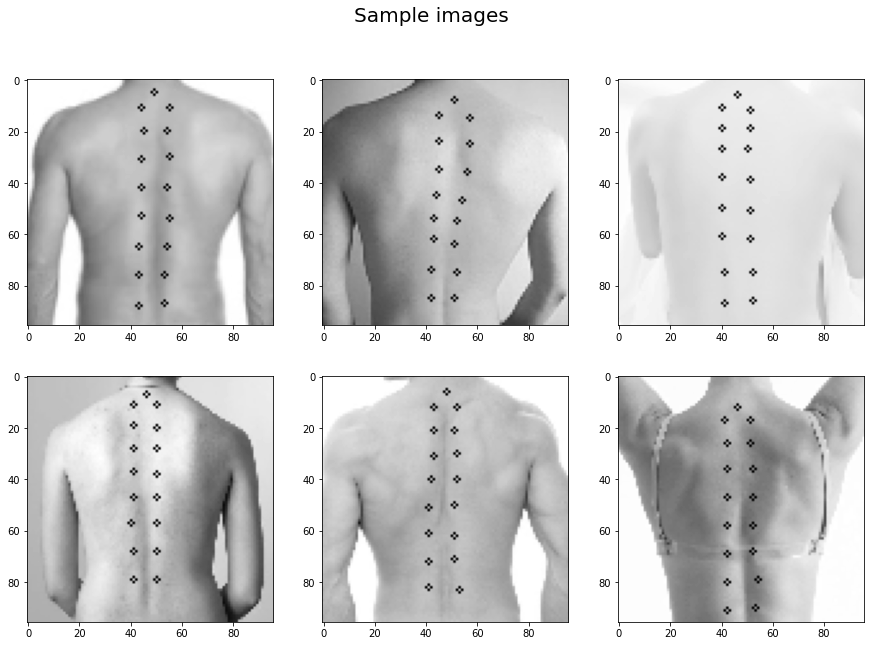

In [86]:
import matplotlib.pylab as plt
import pandas as pd
import random
import cv2

n = x_data.shape[0]
plt.figure(figsize = (15, 10))
# plt.subplots_adjust(hspace = .2)
for i in range(6):
    plt.subplot(2, 3, i + 1)
    k = random.randint(0, n)
    img = x_data[k]
    w, h = img.shape[:2]
    img = img.reshape(w, h)
    points = list(y_data.iloc[k])
    points = [tuple(points[i : i + 2]) for i in range(0, len(points), 2)]
    for x, y in points:
        x *= h
        y *= w
        cv2.circle(img, (int(x), int(y)), 1, (0, 0, 0), 1)
    plt.imshow(img, cmap = 'gray')

_ = plt.suptitle('Sample images', size = 20)

# Training


In [77]:
from sklearn.model_selection import train_test_split
import numpy as np
x_data = x_data.reshape(-1, IMAGE_SIZE, IMAGE_SIZE, 1)
INPUT_SHAPE = x_data.shape[1:]
print("Shape of input: ", INPUT_SHAPE)
NUM_OUTPUT = y_data.shape[1]
print("Number of output: ",NUM_OUTPUT)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.1)
print('x train shape: ', x_train.shape)
print('y train shape: ', y_train.shape)
print('x test shape: ', x_test.shape)
print('y test shape: ', y_test.shape)

Shape of input:  (96, 96, 1)
Number of output:  34
x train shape:  (137, 96, 96, 1)
y train shape:  (137, 34)
x test shape:  (16, 96, 96, 1)
y test shape:  (16, 34)


Built our model

In [78]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, Dropout, BatchNormalization, MaxPooling2D, Flatten, LeakyReLU, Convolution2D, MaxPool2D
model = Sequential()

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False, input_shape = INPUT_SHAPE))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
# model.add(BatchNormalization())
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(NUM_OUTPUT))
model.summary()

'''
# 1st block
model.add(Conv2D(32, (3, 3), padding = 'same', input_shape = input_shape, activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
# model.add(Dropout(0.2))

# 2nd block
model.add(Conv2D(64, (3, 3), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(Dropout(0.3))

# 3rd block
model.add(Conv2D(128, (3, 3), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(Dropout(0.4))

# 4th block
model.add(Conv2D(256, (3, 3), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(Dropout(0.5))

# 5th block
model.add(Conv2D(512, (3, 3), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))

Dense
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(NUM_OUTPUT, activation='softmax'))
model.add(Dense(NUM_OUTPUT))
model.summary()
'''

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 96, 96, 32)        288       
                                                                 
 leaky_re_lu_60 (LeakyReLU)  (None, 96, 96, 32)        0         
                                                                 
 batch_normalization_60 (Bat  (None, 96, 96, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_61 (Conv2D)          (None, 96, 96, 32)        9216      
                                                                 
 leaky_re_lu_61 (LeakyReLU)  (None, 96, 96, 32)        0         
                                                                 
 batch_normalization_61 (Bat  (None, 96, 96, 32)       128       
 chNormalization)                                     

"\n# 1st block\nmodel.add(Conv2D(32, (3, 3), padding = 'same', input_shape = input_shape, activation = 'relu'))\nmodel.add(BatchNormalization())\nmodel.add(Conv2D(32, (3, 3), padding = 'same', activation = 'relu'))\nmodel.add(BatchNormalization())\nmodel.add(MaxPooling2D(pool_size = (2,2)))\n# model.add(Dropout(0.2))\n\n# 2nd block\nmodel.add(Conv2D(64, (3, 3), padding = 'same', activation = 'relu'))\nmodel.add(BatchNormalization())\nmodel.add(Conv2D(64, (3, 3), padding = 'same', activation = 'relu'))\nmodel.add(BatchNormalization())\nmodel.add(MaxPooling2D(pool_size = (2, 2)))\n# model.add(Dropout(0.3))\n\n# 3rd block\nmodel.add(Conv2D(128, (3, 3), padding = 'same', activation = 'relu'))\nmodel.add(BatchNormalization())\nmodel.add(Conv2D(128, (3, 3), padding = 'same', activation = 'relu'))\nmodel.add(BatchNormalization())\nmodel.add(MaxPooling2D(pool_size = (2, 2)))\n# model.add(Dropout(0.4))\n\n# 4th block\nmodel.add(Conv2D(256, (3, 3), padding = 'same', activation = 'relu'))\nmodel.

Compiling our model

In [79]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
model.compile(
    optimizer = 'Adam',
    loss = "mean_squared_error",
    metrics = ['mae']
)

Train our model

In [101]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor = 'val_mae', patience = 25)
hist = model.fit(x_train, y_train, epochs = 150, batch_size = 16, validation_split = 0.2).history

Epoch 1/150
7/7 [==============================] - 2s 85ms/step - loss: 0.0094 - mae: 0.0730 - val_loss: 0.0022 - val_mae: 0.0358
Epoch 2/150
7/7 [==============================] - 0s 27ms/step - loss: 0.0079 - mae: 0.0676 - val_loss: 0.0019 - val_mae: 0.0350
Epoch 3/150
7/7 [==============================] - 0s 28ms/step - loss: 0.0095 - mae: 0.0743 - val_loss: 0.0026 - val_mae: 0.0396
Epoch 4/150
7/7 [==============================] - 0s 27ms/step - loss: 0.0131 - mae: 0.0875 - val_loss: 0.0043 - val_mae: 0.0520
Epoch 5/150
7/7 [==============================] - 0s 28ms/step - loss: 0.0146 - mae: 0.0957 - val_loss: 0.0091 - val_mae: 0.0803
Epoch 6/150
7/7 [==============================] - 0s 28ms/step - loss: 0.0090 - mae: 0.0724 - val_loss: 0.0020 - val_mae: 0.0363
Epoch 7/150
7/7 [==============================] - 0s 28ms/step - loss: 0.0078 - mae: 0.0677 - val_loss: 0.0039 - val_mae: 0.0499
Epoch 8/150
7/7 [==============================] - 0s 28ms/step - loss: 0.0076 - mae: 0.06

Measure accuracy and loss after training

In [102]:
final_loss, final_accuracy = model.evaluate(x_test, y_test)
print('Final loss: {:.2f}'.format(final_loss))
print('Final accuracy: {:.2f}'.format(final_accuracy))

1/1 [==============================] - 0s 30ms/step - loss: 0.0010 - mae: 0.0235
Final loss: 0.00
Final accuracy: 0.02


Plot history

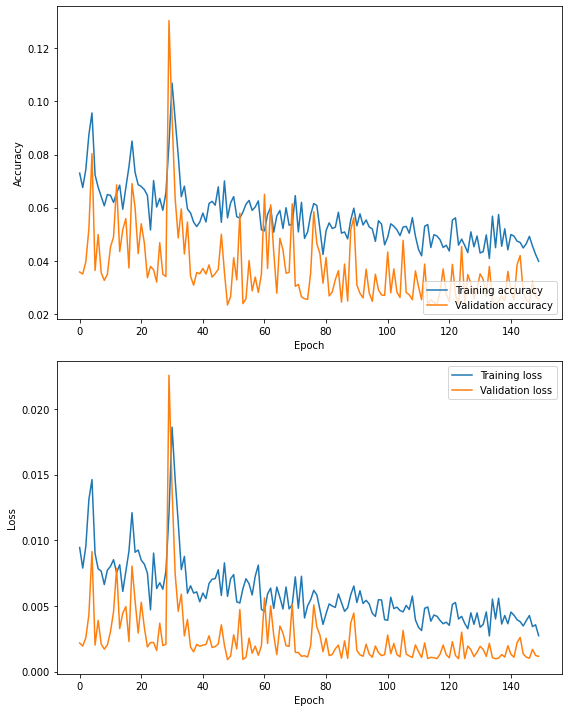

In [103]:
import pandas as pd
import matplotlib.pylab as plt
model_history = pd.DataFrame(hist)
# add epoch column
model_history['epoch'] = np.arange(1, len(model_history) + 1)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (8, 10))
epochs = model_history.shape[0]
ax1.plot(np.arange(0, epochs), model_history['mae'], label = 'Training accuracy')
ax1.plot(np.arange(0, epochs), model_history['val_mae'], label = 'Validation accuracy')
ax1.legend(loc = 'lower right')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax2.plot(np.arange(0, epochs), model_history['loss'], label = 'Training loss')
ax2.plot(np.arange(0, epochs), model_history['val_loss'], label = 'Validation loss')
ax2.legend(loc = 'upper right')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
plt.tight_layout()
plt.show()

Save model

In [104]:
MODEL_NAME = FOLDER + "Model2.h5"
model.save(MODEL_NAME)

# Check predictions

Load model

In [105]:
from keras.models import load_model
model = load_model(MODEL_NAME)

17


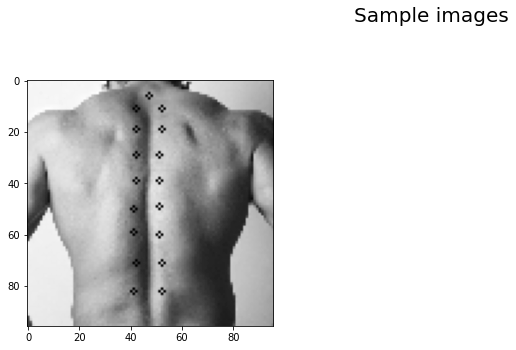

In [116]:
import matplotlib.pylab as plt
import cv2
pred = model.predict(x_test)
n = x_test.shape[0]
w, h = x_test[0].shape[:2] 
plt.figure(figsize = (15, 10))
plt.subplots_adjust(hspace = .2)
for i in range(1):
    plt.subplot(2, 3, i + 1)
    k = random.randint(0, n - 1)
    img = x_test[k].copy()
    img = img.reshape(w, h)
    points = pred[k, :]
    points = [tuple(points[i : i + 2]) for i in range(0, len(points), 2)]
    print(len(points))
    for p in points:
        x, y = p
        x = round(x * h)
        y = round(y * w)
        cv2.circle(img, (int(x), int(y)), 1, (0, 0, 0), 1)
    plt.imshow(img, cmap = 'gray')

_ = plt.suptitle('Sample images', size = 20)